# CSE 152 Discussion 1
## Python installation
You need to install Python 3.5+.

Recommended for Windows and MacOS, Anaconda: https://www.anaconda.com/

Ubuntu: `sudo apt install python3.7`

Other systems: you probably know what you are doing.

## Package management
`conda install {package name}` for Anaconda, `python3 -m pip install {package name}` for pip.

## Jupyter notebook
Install `jupyter`, use `jupyter notebook` command. Go to the indicated URL. `new` -> `python3` or open existing.

All you need: press `H` for help.

Auto-complete: press `tab`.

# Basic Python

In [1]:
# types
integer_number = 1
floating_number = 1.
string = "I am a string"

# find out type
print(type(1), type(1.))

# Evaluation results of the last line is printed
1 + 1

<class 'int'> <class 'float'>


2

In [2]:
# functions
def func(a):
    print('Called func with', a)
    
func('test')

Called func with test


In [3]:
type(func)

function

In [4]:
# containers
list1 = []  # list, like std::vector in c++, ArrayList in Java
map1 = {}  # dictionary, like std::map in c++, Map in Java

import collections  # a lot more containers

In [5]:
a_list = [1,2]
a_list[0] = 0
a_list

[0, 2]

In [7]:
a_tuple = (1,2)
a_tuple[0] = 0

TypeError: 'tuple' object does not support item assignment

In [8]:
# list comprehension
[i + 1 for i in range(10)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Numpy
## Why Numpy?
1. Easy
2. Fast

In [9]:
import numpy as np
import random
import time

In [10]:
N = 10000000

In [11]:
start = time.time()
[random.random() for i in range(N)]
end = time.time()
python_time = end - start
python_time

1.3031680583953857

In [12]:
start = time.time()
np.random.rand(N)
end = time.time()
np_time = end - start
np_time

0.13923406600952148

In [13]:
python_time / np_time

9.359548964879536

In [14]:
python_array = [random.random() for i in range(N)]
np_array = np.array(python_array)

In [15]:
start = time.time()
[python_array[i] + python_array[i] for i in range(len(python_array))]
end = time.time()
python_time = end - start
python_time

1.304980993270874

In [ ]:
start = time.time()
np_array + np_array
end = time.time()
np_time = end - start
np_time

In [ ]:
python_time / np_time

# Numpy useful functions

## Construction

In [16]:
np.array([1,2,3])

array([1, 2, 3])

In [17]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [19]:
ONES = np.ones([2,3])
ONES

array([[1., 1., 1.],
       [1., 1., 1.]])

In [20]:
np.zeros_like(ONES)

array([[0., 0., 0.],
       [0., 0., 0.]])

## Manipulation

In [21]:
A = np.array([[1,2,3],[4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

In [22]:
A.T  # transpose

array([[1, 4],
       [2, 5],
       [3, 6]])

In [23]:
A.reshape([1,6])  # reshape

array([[1, 2, 3, 4, 5, 6]])

In [24]:
A.reshape([-1, 1])  # one dimensions can be inferred by specifying -1

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [25]:
A[0]  # access

array([1, 2, 3])

In [26]:
A[0,0]

1

In [27]:
A[:, 0]  # slice

array([1, 4])

In [28]:
A[0, 1:]  # slice second dimensions

array([2, 3])

In [ ]:
A[0, :A.shape[1]-1]  # inconvenient

In [ ]:
A[0, :-1]  # This is equivalent to the above

In [29]:
A[::-1, ::-1]  # flip (as we saw in class)

array([[6, 5, 4],
       [3, 2, 1]])

## How slicing works
Array[ {start} : {end} : {step} ]

# functions
functions can be applied to an array at once. Numpy has a lot of useful functions. Read documentation or explore the auto-completion.

In [30]:
xs = np.array([0, np.pi / 2, np.pi])
xs

array([0.        , 1.57079633, 3.14159265])

In [ ]:
np.sin(xs)

## Demo: use built-in documentation

In [ ]:
np.log

## Numpy Application
Vector pair-wise distance

In [ ]:
A = np.random.random([100, 128])
A.shape  # A is a dataset with 100 data points, each data has 128 dimensions

In [ ]:
B = np.random.random([100, 128])  # B is another dataset with the same shape

### How do we find the pairwise dot product between each pair of data in A and B?
For example, D[10, 20] should store the dot product between A[10] and B[20].

In [ ]:
# Naive way: loop
start = time.time()
D = np.zeros([100, 100])
for i in range(100):
    for j in range(100):
        for k in range(128):
            D[i,j] += A[i][k] * B[j][k]
naive_time = time.time() - start
naive_time

In [ ]:
D

In [ ]:
start = time.time()
D = A @ B.T
np_time = time.time() - start
np_time

In [ ]:
D

In [ ]:
naive_time / np_time

# Broadcasting

In [ ]:
a = np.array([1,2,3])
a.shape

In [ ]:
a + 1

## Rule 1
arrays of different dimensions cannot add, unless certain conditions are satisfied

In [32]:
a = np.random.random([2,4,7])
b = np.random.random([2,7])
a.shape, b.shape

((2, 4, 7), (2, 7))

In [ ]:
a + b

# Rule 2

If the shapes of arrays are the same length, if some dimension of one array is 1, the other is $k$, then `numpy` can do "boradcasting". First, the array with 1 is copied $k$ times, then the copies are concatenated together on that dimension.

In [33]:
b = b.reshape([2,1,7])
a.shape, b.shape

((2, 4, 7), (2, 1, 7))

In [34]:
(a+b).shape

(2, 4, 7)

# Rule 3

If the arrays do not have the same length, the dimensions of the short array will be expanded at the front

In [35]:
c = np.random.random(7)
a.shape, c.shape

((2, 4, 7), (7,))

In [36]:
(a+c).shape

(2, 4, 7)

In [37]:
d = np.random.random([1,4,7])
e = np.random.random([5,3,1,7])

In [38]:
(d+e).shape

(5, 3, 4, 7)

## Linear algebra

In [39]:
A = np.array([[-1,2,2], [2,2,-1],[2,-1,2]])
A

array([[-1,  2,  2],
       [ 2,  2, -1],
       [ 2, -1,  2]])

In [41]:
v = [1,-1,1]

In [42]:
A @ v  # dot product

array([-1, -1,  5])

In [43]:
np.linalg.det(A)

-27.0

In [44]:
np.linalg.inv(A)

array([[-0.11111111,  0.22222222,  0.22222222],
       [ 0.22222222,  0.22222222, -0.11111111],
       [ 0.22222222, -0.11111111,  0.22222222]])

In [45]:
eigvalues, eigvectors = np.linalg.eig(A)

In [46]:
eigvalues

array([-3.,  3.,  3.])

# Eigenvector visualization

In [47]:
A = np.array([[1,0],[2,-1]])
A

array([[ 1,  0],
       [ 2, -1]])

In [48]:
eigvalues, eigvectors = np.linalg.eig(A)

In [49]:
eigvalues

array([-1.,  1.])

In [50]:
x_axis = np.array([1,0])
y_axis = np.array([0,1])
x_transformed = A @ x_axis
y_transformed = A @ y_axis
eigvectors_transformed = A @ eigvectors

## How matrix transforms the axes

In [51]:
import matplotlib.pyplot as plt
def draw_vector(ax, v, color):
    ax.arrow(0, 0, v[0], v[1], head_width=0.5, head_length=0.4, fc=color, ec=color)

Text(0.5, 1.0, 'transformed')

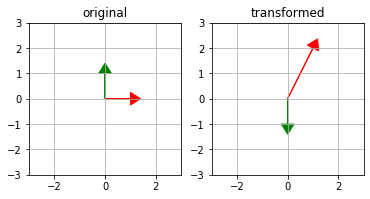

In [52]:
ax = plt.subplot(121)
draw_vector(ax, x_axis, 'red')
draw_vector(ax, y_axis, 'green')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect('equal')
plt.title('original')

ax = plt.subplot(122)
draw_vector(ax, x_transformed, 'red')
draw_vector(ax, y_transformed, 'green')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect('equal')
plt.title('transformed')

## How matrix trasnforms eigenvectors

Text(0.5, 1.0, 'transformed')

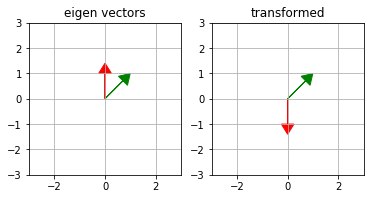

In [53]:
import matplotlib.pyplot as plt

ax = plt.subplot(121)
draw_vector(ax, eigvectors[:,0], 'red')
draw_vector(ax, eigvectors[:,1], 'green')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect('equal')
plt.title('eigen vectors')

ax = plt.subplot(122)
draw_vector(ax, eigvectors_transformed[:,0], 'red')
draw_vector(ax, eigvectors_transformed[:,1], 'green')
plt.grid()
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.gca().set_aspect('equal')
plt.title('transformed')

## SVD and Least Square
will be covered next week

In [54]:
A = np.array([[-1, 0.5], [2,1]])
A

array([[-1. ,  0.5],
       [ 2. ,  1. ]])

In [55]:
# SVD
U,S,VH = np.linalg.svd(A)

In [56]:
U @ np.diag(S) @ VH

array([[-1. ,  0.5],
       [ 2. ,  1. ]])

In [57]:
print(U)
print(np.diag(S))
print(VH)

[[-0.33100694  0.94362832]
 [ 0.94362832  0.33100694]]
[[2.35078106 0.        ]
 [0.         0.85078106]]
[[ 0.94362832  0.33100694]
 [-0.33100694  0.94362832]]


Text(0.5, 1.0, 'after transform')

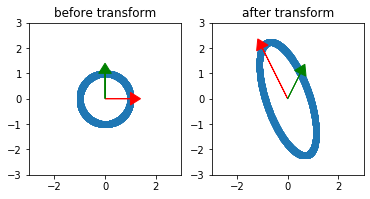

In [58]:
ts = np.linspace(0, 2 * np.pi, 1000)
xs = np.cos(ts)
ys = np.sin(ts)
points = np.vstack([xs, ys])
points_transformed = A @ points

ax = plt.subplot(121)
draw_vector(ax, [1,0], 'red')
draw_vector(ax, [0,1], 'green')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(points[0], points[1])
plt.gca().set_aspect('equal')
plt.title('before transform')

ax = plt.subplot(122)
draw_vector(ax, A @ np.array([1,0]), 'red')
draw_vector(ax, A @ np.array([0,1]), 'green')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(points_transformed[0], points_transformed[1])
plt.gca().set_aspect('equal')
plt.title('after transform')

Text(0.5, 1.0, 'apply U')

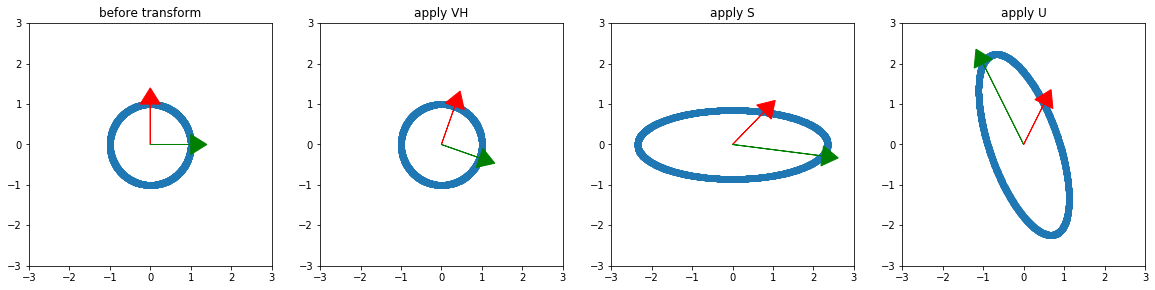

In [59]:
ts = np.linspace(0, 2 * np.pi, 1000)
xs = np.cos(ts)
ys = np.sin(ts)
points = np.vstack([xs, ys])
points_VH = VH @ points
points_S = np.diag(S) @ points_VH
points_U = U @ points_S

x_axis = np.array([0, 1])
x_axis_VH = VH @ x_axis
x_axis_S = np.diag(S) @ x_axis_VH
x_axis_U = U @ x_axis_S

y_axis = np.array([1, 0])
y_axis_VH = VH @ y_axis
y_axis_S = np.diag(S) @ y_axis_VH
y_axis_U = U @ y_axis_S


plt.figure(figsize=[20, 10])

ax = plt.subplot(141)
draw_vector(ax, x_axis, 'red')
draw_vector(ax, y_axis, 'green')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(points[0], points[1])
plt.gca().set_aspect('equal')
plt.title('before transform')

ax = plt.subplot(142)
draw_vector(ax, x_axis_VH, 'red')
draw_vector(ax, y_axis_VH, 'green')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(points_VH[0], points_VH[1])
plt.gca().set_aspect('equal')
plt.title('apply VH')

ax = plt.subplot(143)
draw_vector(ax, x_axis_S, 'red')
draw_vector(ax, y_axis_S, 'green')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(points_S[0], points_S[1])
plt.gca().set_aspect('equal')
plt.title('apply S')

ax = plt.subplot(144)
draw_vector(ax, x_axis_U, 'red')
draw_vector(ax, y_axis_U, 'green')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.scatter(points_U[0], points_U[1])
plt.gca().set_aspect('equal')
plt.title('apply U')

In [60]:
# linear least square
xs = np.linspace(0, 10, 100)
ys = 2 * xs + 4 * np.random.random(xs.shape) - 2

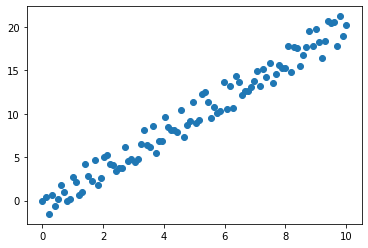

In [61]:
plt.scatter(xs, ys)

In [62]:
data = np.zeros([100, 2])
data[:, 0] = xs
data[:, 1] = ys

In [63]:
coeff,_,_,_ = np.linalg.lstsq(xs.reshape([-1, 1]), ys)

/Users/haosu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


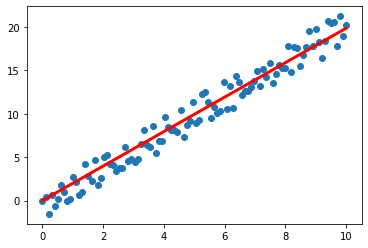

In [64]:
plt.scatter(xs, ys)
plt.plot(xs, xs.reshape([-1, 1]) @ coeff, color='red', linewidth=3)

# Matplotlib

In [65]:
import matplotlib.pyplot as plt

In [66]:
xs = np.linspace(0, 2 * np.pi, 1000)
xs.shape

(1000,)

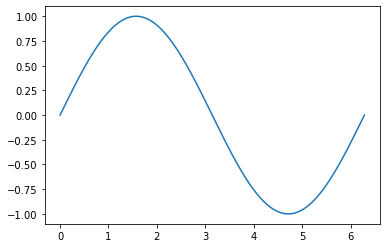

In [67]:
plt.plot(xs, np.sin(xs))

In [69]:
from PIL import Image

img = plt.imread('lenna.png')
gray_img = img.mean(-1)

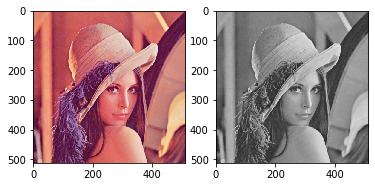

In [70]:
plt.subplot(121)
plt.imshow(img, vmin=0, vmax=1)
plt.subplot(122)
plt.imshow(gray_img, vmin=0, vmax=1, cmap='gray')

In [ ]:
plt.subplot(121)
plt.imshow(gray_img, vmin=0, vmax=1, cmap='inferno')
plt.subplot(122)
plt.imshow(gray_img, vmin=0, vmax=1, cmap='jet')

In [72]:
import scipy.signal as ss

In [ ]:
v_edges = ss.convolve2d(gray_img, np.array([[1,0,-1], [2,0,-2],[1,0,-1]]), mode='same')

In [ ]:
v_edges.min(), v_edges.max()

In [ ]:
plt.imshow(v_edges, cmap='gray')

In [ ]:
plt.subplot(121)
plt.imshow(v_edges, vmin=0, vmax=1, cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(v_edges), vmin=0, vmax=1, cmap='gray')